In [1]:
library(microbiome)
library(tidyverse)
library (phyloseq)
library(vegan)

Loading required package: phyloseq

Loading required package: ggplot2


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: 'microbiome'


The following object is masked from 'package:ggplot2':

    alpha


The following object is masked from 'package:base':

    transform


── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ microbiome::alpha() masks gg

In [2]:
ASV_12S_table_raw <- read.csv("Files for Hongkong data/12S_ASV_table.csv") |>
                     tibble::column_to_rownames(var = "ASV_ID") |>
                      as.matrix()

In [3]:
taxa_12S_table_raw <- read.csv("Files for Hongkong data/12S_taxa_table.csv") |>
                      tibble::column_to_rownames(var = "ASV_ID") |>
                      as.matrix()

In [4]:
metadata_combined_12S <- read.csv("Files for Hongkong data/metadata_combined.csv")

In [5]:
head(metadata_combined_12S, 5)

,SampleID_for_DataAnalysis,Original_SampleName,SampleName_for_Sequence,I7_Index_ID,index,I5_Index_ID,index2,I7_Index_ID.1,index3,I5_Index_ID.1,⋯,Average_water_temp,Wildlife_seen,DNA_conc_after_1stPCR..ng.ul.,total_reads,dilution_ratio,X,X.1,X.2,X.3,X.4
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,S001,LB1,eDNA_0046_12S_S001,eDNA1st_Elas02-f_IPg0001_F,AACTTTCC,eDNA1st_Elas02-r_IPg001_R,AACTTTCC,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,⋯,NA,,0.03,0,1/1,NA,NA,NA,NA,NA
2,S002,LB2,eDNA_0046_12S_S002,eDNA1st_Elas02-f_IPg0002_F,GTATCCTA,eDNA1st_Elas02-r_IPg002_R,GTATCCTA,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,⋯,NA,,0.17,0,1/1,NA,NA,NA,NA,NA
3,S003,LB3,eDNA_0046_12S_S003,eDNA1st_Elas02-f_IPg0003_F,AGCGGACG,eDNA1st_Elas02-r_IPg003_R,AGCGGACG,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,⋯,NA,,0.26,0,1/1,NA,NA,NA,NA,NA
4,S004,PCR_NC1,eDNA_0046_12S_S004,eDNA1st_Elas02-f_IPg0004_F,CTACAACC,eDNA1st_Elas02-r_IPg004_R,CTACAACC,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,⋯,NA,,0.00,0,1st,NA,NA,NA,NA,NA
5,S005,PCR_NC2,eDNA_0046_12S_S005,eDNA1st_Elas02-f_IPg0005_F,ATATAAGG,eDNA1st_Elas02-r_IPg005_R,ATATAAGG,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,⋯,NA,,0.00,0,1st,NA,NA,NA,NA,NA


In [6]:
(sequencer_names <- colnames(ASV_12S_table_raw))

[1] "eDNA_0046_12S_S009" "eDNA_0046_12S_S010" "eDNA_0046_12S_S011"
 [4] "eDNA_0046_12S_S012" "eDNA_0046_12S_S013" "eDNA_0046_12S_S014"
 [7] "eDNA_0046_12S_S015" "eDNA_0046_12S_S016" "eDNA_0046_12S_S019"
[10] "eDNA_0046_12S_S023" "eDNA_0046_12S_S033" "eDNA_0046_12S_S034"
[13] "eDNA_0046_12S_S035" "eDNA_0046_12S_S036" "eDNA_0046_12S_S037"
[16] "eDNA_0046_12S_S038" "eDNA_0046_12S_S039" "eDNA_0046_12S_S040"
[19] "eDNA_0046_12S_S041" "eDNA_0046_12S_S042" "eDNA_0046_12S_S044"
[22] "eDNA_0046_12S_S045" "eDNA_0046_12S_S046" "eDNA_0046_12S_S047"
[25] "eDNA_0046_12S_S048" "eDNA_0046_12S_S051" "eDNA_0046_12S_S057"
[28] "eDNA_0046_12S_S058" "eDNA_0046_12S_S059" "eDNA_0046_12S_S063"

In [7]:
# Filter the metadata using sample names in the ASV table and create a data frame
rename_columns <- metadata_combined_12S %>% 
                   dplyr::filter(SampleName_for_Sequence %in% sequencer_names) |>
                   dplyr::select(Original_SampleName, SampleName_for_Sequence)
head(rename_columns)

,Original_SampleName,SampleName_for_Sequence
,<chr>,<chr>
1,dH2O ABS,eDNA_0046_12S_S009
2,dH2O DBS,eDNA_0046_12S_S010
3,dH2O FBS,eDNA_0046_12S_S011
4,dH2O GBS,eDNA_0046_12S_S012
5,dH2O MBS,eDNA_0046_12S_S013
6,dH2O PBS,eDNA_0046_12S_S014


In [8]:
metadata_combined_12S

SampleID_for_DataAnalysis,Original_SampleName,SampleName_for_Sequence,I7_Index_ID,index,I5_Index_ID,index2,I7_Index_ID.1,index3,I5_Index_ID.1,⋯,Average_water_temp,Wildlife_seen,DNA_conc_after_1stPCR..ng.ul.,total_reads,dilution_ratio,X,X.1,X.2,X.3,X.4
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
S001,LB1,eDNA_0046_12S_S001,eDNA1st_Elas02-f_IPg0001_F,AACTTTCC,eDNA1st_Elas02-r_IPg001_R,AACTTTCC,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,⋯,NA,,0.03,0,1/1,NA,NA,NA,NA,NA
S002,LB2,eDNA_0046_12S_S002,eDNA1st_Elas02-f_IPg0002_F,GTATCCTA,eDNA1st_Elas02-r_IPg002_R,GTATCCTA,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,⋯,NA,,0.17,0,1/1,NA,NA,NA,NA,NA
S003,LB3,eDNA_0046_12S_S003,eDNA1st_Elas02-f_IPg0003_F,AGCGGACG,eDNA1st_Elas02-r_IPg003_R,AGCGGACG,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,⋯,NA,,0.26,0,1/1,NA,NA,NA,NA,NA
S004,PCR_NC1,eDNA_0046_12S_S004,eDNA1st_Elas02-f_IPg0004_F,CTACAACC,eDNA1st_Elas02-r_IPg004_R,CTACAACC,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,⋯,NA,,0.00,0,1st,NA,NA,NA,NA,NA
S005,PCR_NC2,eDNA_0046_12S_S005,eDNA1st_Elas02-f_IPg0005_F,ATATAAGG,eDNA1st_Elas02-r_IPg005_R,ATATAAGG,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,⋯,NA,,0.00,0,1st,NA,NA,NA,NA,NA
S006,PCR_NC3,eDNA_0046_12S_S006,eDNA1st_Elas02-f_IPg0006_F,TAAACTGA,eDNA1st_Elas02-r_IPg006_R,TAAACTGA,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,⋯,NA,,0.00,0,1st,NA,NA,NA,NA,NA
S007,PCR_NC4,eDNA_0046_12S_S007,eDNA1st_Elas02-f_IPg0007_F,GGGGAAAT,eDNA1st_Elas02-r_IPg007_R,GGGGAAAT,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,⋯,NA,,0.00,0,2nd,NA,NA,NA,NA,NA
S008,PCR_NC5,eDNA_0046_12S_S008,eDNA1st_Elas02-f_IPg0008_F,CTGTGTTC,eDNA1st_Elas02-r_IPg008_R,CTGTGTTC,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,⋯,NA,,0.00,0,2nd,NA,NA,NA,NA,NA
S009,dH2O ABS,eDNA_0046_12S_S009,eDNA1st_Elas02-f_IPg0009_F,TAGATTTA,eDNA1st_Elas02-r_IPg009_R,TAGATTTA,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,⋯,NA,,0.15,1805,1/1,NA,NA,NA,NA,NA


In [9]:
#You have samples with zero data
(drop_samples <-  colSums(ASV_12S_table_raw) |>
                  data.frame() |>
                  `colnames<-`("counts") |>
                  tibble::rownames_to_column(var = "SampleName_for_Sequence") |>
                  dplyr::filter(counts == 0))

SampleName_for_Sequence,counts
<chr>,<dbl>
eDNA_0046_12S_S013,0
eDNA_0046_12S_S016,0
eDNA_0046_12S_S036,0
eDNA_0046_12S_S037,0
eDNA_0046_12S_S038,0
eDNA_0046_12S_S044,0


In [10]:
#transpose the table and make the column name a column in the table using the same name in our metadata
#Drop samples with zero counts
`%nin%` <- Negate(`%in%`)
t_ASV_12S_table_raw <- t(ASV_12S_table_raw) |>
                       data.frame() |>
                       tibble::rownames_to_column(var = "SampleName_for_Sequence") |>
                       dplyr::filter(SampleName_for_Sequence %nin% drop_samples$SampleName_for_Sequence)
head(t_ASV_12S_table_raw)

,SampleName_for_Sequence,ASV1_206,ASV2_206,ASV3_208,ASV4_215,ASV5_216,ASV6_216,ASV7_216,ASV8_216,ASV9_217,⋯,ASV165_230,ASV166_230,ASV167_230,ASV168_230,ASV169_230,ASV170_230,ASV171_230,ASV172_230,ASV173_240,ASV174_240
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,eDNA_0046_12S_S009,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,eDNA_0046_12S_S010,0,0,0,0,0,0,0,0,130,⋯,0,0,0,0,0,0,0,0,0,0
3,eDNA_0046_12S_S011,0,0,0,0,461,0,0,0,13295,⋯,0,0,0,0,0,0,0,0,0,0
4,eDNA_0046_12S_S012,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,eDNA_0046_12S_S014,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,eDNA_0046_12S_S015,0,0,0,0,0,0,0,0,4735,⋯,0,0,0,0,0,0,0,0,0,0


In [11]:
#merge with our renamed data frame
merged_t_ASV_12S_table_raw <- merge(rename_columns, t_ASV_12S_table_raw)
head(merged_t_ASV_12S_table_raw)

,SampleName_for_Sequence,Original_SampleName,ASV1_206,ASV2_206,ASV3_208,ASV4_215,ASV5_216,ASV6_216,ASV7_216,ASV8_216,⋯,ASV165_230,ASV166_230,ASV167_230,ASV168_230,ASV169_230,ASV170_230,ASV171_230,ASV172_230,ASV173_240,ASV174_240
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,eDNA_0046_12S_S009,dH2O ABS,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,eDNA_0046_12S_S010,dH2O DBS,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,eDNA_0046_12S_S011,dH2O FBS,0,0,0,0,461,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,eDNA_0046_12S_S012,dH2O GBS,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,eDNA_0046_12S_S014,dH2O PBS,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,eDNA_0046_12S_S015,dH2O PNS,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [12]:
# remove the SampleName_for_Sequence and then transpose back
# We have our fixed table
fixed_ASV_12S_table_raw <- merged_t_ASV_12S_table_raw |>
                           select(-SampleName_for_Sequence) |>
                           column_to_rownames(var = "Original_SampleName") |>
                            t()
head(fixed_ASV_12S_table_raw)

,dH2O ABS,dH2O DBS,dH2O FBS,dH2O GBS,dH2O PBS,dH2O PNS,DBSS,GBSS,dH2O ABW,dH2O DBW,⋯,ABDW,DHSW,DHDW,FBSW,FBDW,MBSW,SASW,SADW,dH2O SAW,PCR_NC7
ASV1_206,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ASV2_206,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ASV3_208,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ASV4_215,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ASV5_216,0,0,461,0,0,0,0,0,12485,0,⋯,0,0,0,0,0,0,0,0,0,0
ASV6_216,0,0,0,0,0,0,0,0,20,0,⋯,0,0,0,0,0,0,0,0,0,0


In [13]:
metadata_combined_12S$Original_SampleName

[1] "LB1"      "LB2"      "LB3"      "PCR_NC1"  "PCR_NC2"  "PCR_NC3" 
  [7] "PCR_NC4"  "PCR_NC5"  "dH2O ABS" "dH2O DBS" "dH2O FBS" "dH2O GBS"
 [13] "dH2O MBS" "dH2O PBS" "dH2O PNS" "dH2O SAS" "ABSS"     "ABDS"    
 [19] "DBSS"     "DBDS"     "FBSS"     "FBDS"     "GBSS"     "GBDS"    
 [25] "MBSS"     "MBDS"     "PBSS"     "PBDS"     "PNSS"     "PNDS"    
 [31] "SASS"     "SADS"     "dH2O ABW" "dH2O DBW" "dH2O DHW" "dH2O FBW"
 [37] "dH2O GBW" "dH2O MBW" "dH2O PBW" "dH2O PNW" "ABSW"     "ABDW"    
 [43] "DBSW "    "DBDW"     "DHSW"     "DHDW"     "FBSW "    "FBDW"    
 [49] "GBSW"     "GBDW"     "MBSW"     "MBDW"     "PBSW"     "PBDW"    
 [55] "PNSW"     "PNDW"     "SASW"     "SADW"     "dH2O SAW" "FSS1"    
 [61] "FMD2"     "PCR_NC6"  "PCR_NC7"  "PCR_NC8"  ""         ""        
 [67] ""         ""         ""         ""         ""         ""        
 [73] ""         ""         ""         ""         ""         ""        
 [79] ""         ""         ""         ""         ""         ""        
 [85] ""         ""         ""         ""         ""         ""        
 [91] ""         ""         ""         ""         ""         ""        
 [97] ""         ""         ""         ""         ""         ""        
[103] ""         ""         ""         ""         ""         ""        
[109] ""         ""         ""         ""         ""         ""        
[115] ""         ""         ""         ""         ""         ""        
[121] ""         ""         ""         ""         ""         ""        
[127] ""         ""         ""

In [14]:
#Filter the metadata to keep only those samples that we have ASV data for
fixed_metadata_combined_12S <- metadata_combined_12S[metadata_combined_12S$Original_SampleName %in% colnames(fixed_ASV_12S_table_raw),]  

In [15]:
#add sample names as row names to the metadata
row.names(fixed_metadata_combined_12S) <- fixed_metadata_combined_12S$Original_SampleName

In [16]:
head(fixed_metadata_combined_12S, 5)

,SampleID_for_DataAnalysis,Original_SampleName,SampleName_for_Sequence,I7_Index_ID,index,I5_Index_ID,index2,I7_Index_ID.1,index3,I5_Index_ID.1,⋯,Average_water_temp,Wildlife_seen,DNA_conc_after_1stPCR..ng.ul.,total_reads,dilution_ratio,X,X.1,X.2,X.3,X.4
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
dH2O ABS,S009,dH2O ABS,eDNA_0046_12S_S009,eDNA1st_Elas02-f_IPg0009_F,TAGATTTA,eDNA1st_Elas02-r_IPg009_R,TAGATTTA,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,⋯,NA,,0.15,1805,1/1,NA,NA,NA,NA,NA
dH2O DBS,S010,dH2O DBS,eDNA_0046_12S_S010,eDNA1st_Elas02-f_IPg0010_F,AATGCGTA,eDNA1st_Elas02-r_IPg010_R,AATGCGTA,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,⋯,NA,,1.32,6538,1/1,NA,NA,NA,NA,NA
dH2O FBS,S011,dH2O FBS,eDNA_0046_12S_S011,eDNA1st_Elas02-f_IPg0011_F,CATAAGCA,eDNA1st_Elas02-r_IPg011_R,CATAAGCA,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,⋯,NA,,1.37,39935,1/1,NA,NA,NA,NA,NA
dH2O GBS,S012,dH2O GBS,eDNA_0046_12S_S012,eDNA1st_Elas02-f_IPg0012_F,CGTGTTGT,eDNA1st_Elas02-r_IPg012_R,CGTGTTGT,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,⋯,NA,,0.63,7196,1/1,NA,NA,NA,NA,NA
dH2O PBS,S014,dH2O PBS,eDNA_0046_12S_S014,eDNA1st_Elas02-f_IPg0014_F,GCTACGAA,eDNA1st_Elas02-r_IPg014_R,GCTACGAA,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,⋯,NA,,0.27,117,1/1,NA,NA,NA,NA,NA


In [17]:
#Assign to phyloseq object
ASV_12S_table <- phyloseq::otu_table(fixed_ASV_12S_table_raw, taxa_are_rows =  T)
taxa_12S_table <- phyloseq::tax_table(taxa_12S_table_raw)
metadata  <-  phyloseq::sample_data(fixed_metadata_combined_12S)

In [18]:
#Make it into one phyloseq object
physeq_12S <- phyloseq::phyloseq(ASV_12S_table, taxa_12S_table, metadata)

Warning message in class(mat) <- "matrix":
"Setting class(x) to "matrix" sets attribute to NULL; result will no longer be an S4 object"
Warning message in rarecurve(mat, step = 100, sample = raremax, col = "blue"):
"most observed count data have counts 1, but smallest count is 2"


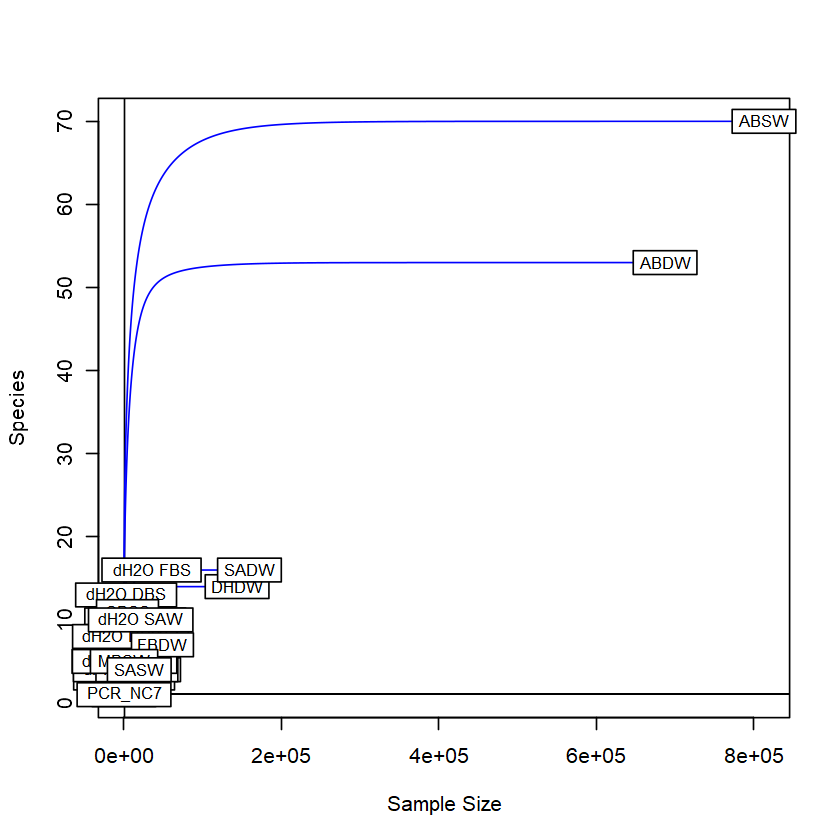

In [19]:
#Apparently this issue with rarecure is a well-known bug https://github.com/joey711/phyloseq/issues/1641
mat <- as.matrix(t(otu_table(physeq_12S)))
class(mat) <- "matrix"
raremax <- min(rowSums(mat))
rarecurve(mat, step = 100, sample = raremax, col = "blue")


In [20]:
physeq_12S_PA <-  microbiome::transform(physeq_12S, "pa")

In [21]:
physeq_12S_ord <-  phyloseq::ordinate(physeq_12S_PA, "NMDS", "jaccard")

Run 0 stress 0.009959832 
Run 1 stress 0.0005826011 
... New best solution
... Procrustes: rmse 0.1091945  max resid 0.3624742 
Run 2 stress 0.0001449423 
... New best solution
... Procrustes: rmse 0.1115958  max resid 0.4440064 
Run 3 stress 0.001967604 
Run 4 stress 0.003668775 
Run 5 stress 0.0002623412 
... Procrustes: rmse 0.1898746  max resid 0.7693379 
Run 6 stress 0.002577627 
Run 7 stress 0.0005083225 
... Procrustes: rmse 0.01748988  max resid 0.06803708 
Run 8 stress 0.0007926584 
Run 9 stress 0.001742827 
Run 10 stress 0.004261164 
Run 11 stress 0.003642729 
Run 12 stress 0.003622906 
Run 13 stress 0.002598749 
Run 14 stress 0.0007244857 
Run 15 stress 0.0005236356 
... Procrustes: rmse 0.1833367  max resid 0.7840843 
Run 16 stress 0.001031456 
Run 17 stress 0.0003807202 
... Procrustes: rmse 0.0752153  max resid 0.2865106 
Run 18 stress 0.0002937664 
... Procrustes: rmse 0.1519389  max resid 0.6056955 
Run 19 stress 0.0005655813 
... Procrustes: rmse 0.170048  max resid 0.

Warning message in metaMDS(veganifyOTU(physeq), distance, ...):
"stress is (nearly) zero: you may have insufficient data"


In [22]:
colnames(sample_data(physeq_12S_PA))

[1] "SampleID_for_DataAnalysis"     "Original_SampleName"          
 [3] "SampleName_for_Sequence"       "I7_Index_ID"                  
 [5] "index"                         "I5_Index_ID"                  
 [7] "index2"                        "I7_Index_ID.1"                
 [9] "index3"                        "I5_Index_ID.1"                
[11] "index4"                        "Location"                     
[13] "Average_depths"                "Average_water_temp"           
[15] "Wildlife_seen"                 "DNA_conc_after_1stPCR..ng.ul."
[17] "total_reads"                   "dilution_ratio"               
[19] "X"                             "X.1"                          
[21] "X.2"                           "X.3"                          
[23] "X.4"

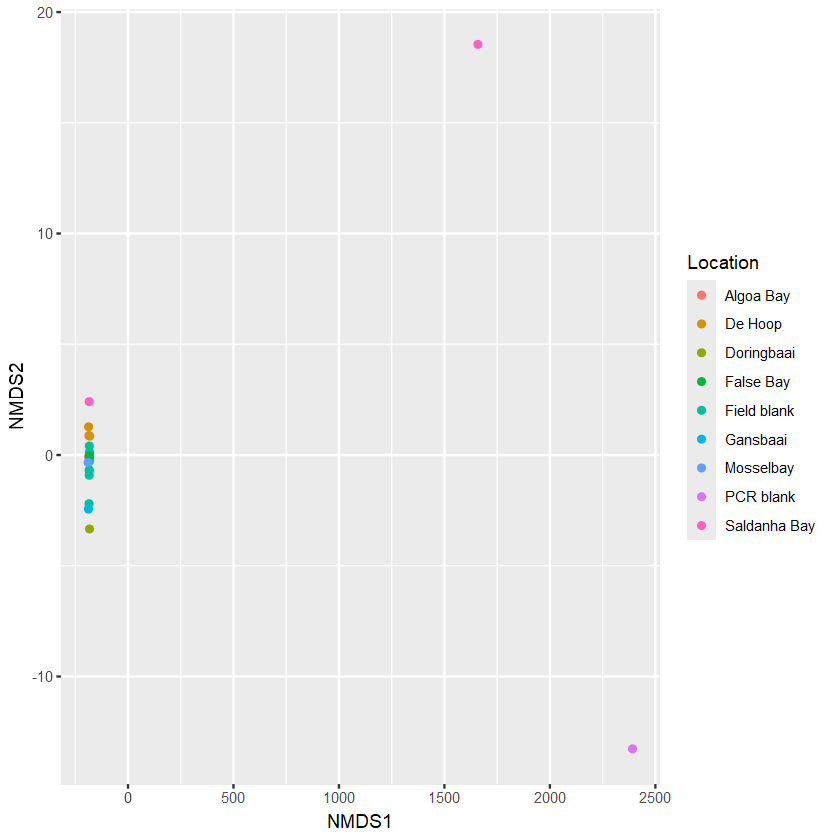

In [23]:
phyloseq::plot_ordination(physeq_12S_PA, physeq_12S_ord, type="samples", color="Location") 